In [69]:
from transformers import AutoModelForTokenClassification, AutoTokenizer
import torch

In [70]:
model = AutoModelForTokenClassification.from_pretrained("monologg/biobert_v1.1_pubmed")
tokenizer = AutoTokenizer.from_pretrained("monologg/biobert_v1.1_pubmed")

Some weights of the model checkpoint at monologg/biobert_v1.1_pubmed were not used when initializing BertForTokenClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at 

In [71]:
from transformers import pipeline

nlp = pipeline('ner', model=model, tokenizer=tokenizer, grouped_entities=True)
nlp('''Emerging data suggest that the sequelae of infection with SARS-CoV-2 and the disease it causes, covid-19, could vary in presentation and extend beyond the typical postviral recovery period. Hence epidemiologic interest in morbidity after the acute infection in survivors is growing. Some survivors experience serious complications during the acute phase of the illness, affecting pulmonary, cardiovascular, hepatic, renal, cognitive, and neurologic function.''')

[{'entity_group': 'LABEL_0',
  'score': 0.5081918835639954,
  'word': 'Em',
  'start': 0,
  'end': 2},
 {'entity_group': 'LABEL_1',
  'score': 0.5260109305381775,
  'word': '##erging',
  'start': 2,
  'end': 8},
 {'entity_group': 'LABEL_0',
  'score': 0.5429350052561078,
  'word': 'data suggest that the sequelae of',
  'start': 9,
  'end': 42},
 {'entity_group': 'LABEL_1',
  'score': 0.5123806595802307,
  'word': 'infection',
  'start': 43,
  'end': 52},
 {'entity_group': 'LABEL_0',
  'score': 0.5840914567311605,
  'word': 'with SARS - CoV - 2 and the disease it causes, co',
  'start': 53,
  'end': 98},
 {'entity_group': 'LABEL_1',
  'score': 0.512951672077179,
  'word': '##vid',
  'start': 98,
  'end': 101},
 {'entity_group': 'LABEL_0',
  'score': 0.6187946597735087,
  'word': '- 19,',
  'start': 101,
  'end': 105},
 {'entity_group': 'LABEL_1',
  'score': 0.5347038507461548,
  'word': 'could',
  'start': 106,
  'end': 111},
 {'entity_group': 'LABEL_0',
  'score': 0.5536202490329742,
 

In [41]:
label_list = [
    "O",       # Outside of a named entity
    "B-bio",  # Beginning of bio entity
    "I-bio"  # Middle of bio entity
]

sequence = '''Emerging data suggest that the sequelae of infection with SARS-CoV-2 and the disease it causes, covid-19, could vary in presentation and extend beyond the typical postviral recovery period. Hence epidemiologic interest in morbidity after the acute infection in survivors is growing. Some survivors experience serious complications during the acute phase of the illness, affecting pulmonary, cardiovascular, hepatic, renal, cognitive, and neurologic function.'''

# Bit of a hack to get the tokens with the special tokens
tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sequence)))
inputs = tokenizer.encode(sequence, return_tensors="pt")

outputs = model(inputs)[0]
predictions = torch.argmax(outputs, dim=2)

print([(token, label_list[prediction]) for token, prediction in zip(tokens, predictions[0].tolist())])

[('[CLS]', 'O'), ('Em', 'B-bio'), ('##erging', 'O'), ('data', 'O'), ('suggest', 'O'), ('that', 'O'), ('the', 'B-bio'), ('sequel', 'O'), ('##ae', 'O'), ('of', 'B-bio'), ('infection', 'O'), ('with', 'B-bio'), ('SA', 'B-bio'), ('##RS', 'O'), ('-', 'B-bio'), ('Co', 'B-bio'), ('##V', 'B-bio'), ('-', 'B-bio'), ('2', 'B-bio'), ('and', 'O'), ('the', 'O'), ('disease', 'B-bio'), ('it', 'O'), ('causes', 'B-bio'), (',', 'O'), ('co', 'B-bio'), ('##vid', 'O'), ('-', 'B-bio'), ('19', 'B-bio'), (',', 'O'), ('could', 'B-bio'), ('vary', 'O'), ('in', 'O'), ('presentation', 'O'), ('and', 'B-bio'), ('extend', 'O'), ('beyond', 'O'), ('the', 'B-bio'), ('typical', 'B-bio'), ('post', 'O'), ('##vir', 'B-bio'), ('##al', 'B-bio'), ('recovery', 'B-bio'), ('period', 'B-bio'), ('.', 'O'), ('Hence', 'O'), ('e', 'B-bio'), ('##pid', 'B-bio'), ('##em', 'B-bio'), ('##iol', 'B-bio'), ('##og', 'O'), ('##ic', 'B-bio'), ('interest', 'O'), ('in', 'B-bio'), ('m', 'B-bio'), ('##or', 'B-bio'), ('##bid', 'O'), ('##ity', 'B-bio'),

# Pytorch

In [10]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD" -O biobert_weights && rm -rf /tmp/cookies.txt

!tar -xzf biobert_weights

!transformers-cli convert --model_type bert --tf_checkpoint biobert_v1.1_pubmed/model.ckpt-1000000 --config biobert_v1.1_pubmed/bert_config.json --pytorch_dump_output biobert_v1.1_pubmed/pytorch_model.bin

!mv biobert_v1.1_pubmed/bert_config.json biobert_v1.1_pubmed/config.json

--2021-05-22 11:22:53--  https://docs.google.com/uc?export=download&confirm=Lx2L&id=1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD
Resolving docs.google.com (docs.google.com)... 142.250.200.14
Connecting to docs.google.com (docs.google.com)|142.250.200.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-3k-docs.googleusercontent.com/docs/securesc/39iuph8lanutedb5v1gf7hi4ujhe3fgj/3fld19roh8vkn15pi50p6e8tieeito5p/1621678950000/13799006341648886493/12422190789740976425Z/1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD?e=download [following]
--2021-05-22 11:22:53--  https://doc-14-3k-docs.googleusercontent.com/docs/securesc/39iuph8lanutedb5v1gf7hi4ujhe3fgj/3fld19roh8vkn15pi50p6e8tieeito5p/1621678950000/13799006341648886493/12422190789740976425Z/1R84voFKHfWV9xjzeLzWBbmY1uOMYpnyD?e=download
Resolving doc-14-3k-docs.googleusercontent.com (doc-14-3k-docs.googleusercontent.com)... 142.250.187.193
Connecting to doc-14-3k-docs.googleusercontent.com (doc-14-3k-docs.goo

In [12]:
import os
import re
import csv
import itertools

import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
from collections import defaultdict, OrderedDict

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import RandomSampler, SequentialSampler
from pytorch_pretrained_bert import BertModel, BertTokenizer, BertConfig
from transformers import BertForTokenClassification, AdamW
from transformers import get_linear_schedule_with_warmup

import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pytorch_pretrained_bert

In [13]:
MAX_LEN = 75
BATCH_SIZE = 32
tokenizer = BertTokenizer(vocab_file='biobert_v1.1_pubmed/vocab.txt', do_lower_case=False)

In [17]:
data = pd.read_csv('/Users/sdeshpande/Desktop/bioinformatices/MTL-Bioinformatics-2016/data/JNLPBA/train.tsv', sep = '\t')
data.columns = ['words', 'tags']
tag_values = data['tags'].values
vocab_len = len(tag_values)
print('Entity Types:',vocab_len)

Entity Types: 446889


In [19]:
df_tags = pd.DataFrame({'tags':tag_values})
df_tags.to_csv('bionlp_tags.csv',index=False)
df = pd.read_csv('bionlp_tags.csv')
print('Tag Preview:\n', df)

Tag Preview:
              tags
0           B-DNA
1           I-DNA
2               O
3               O
4       B-protein
...           ...
446884          O
446885          O
446886  B-protein
446887          O
446888          O

[446889 rows x 1 columns]


In [20]:
class SentenceFetch(object):
  
  def __init__(self, data):
    self.data = data
    self.sentences = []
    self.tags = []
    self.sent = []
    self.tag = []
    
    # make tsv file readable
    with open(self.data) as tsv_f:
      reader = csv.reader(tsv_f, delimiter='\t')
      for row in reader:
        if len(row) == 0:
          if len(self.sent) != len(self.tag):
            break
          self.sentences.append(self.sent)
          self.tags.append(self.tag)
          self.sent = []
          self.tag = []
        else:
          self.sent.append(row[0])
          self.tag.append(row[1])   

  def getSentences(self):
    return self.sentences
  
  def getTags(self):
    return self.tags

In [27]:
corpora = '/Users/sdeshpande/Desktop/bioinformatices/MTL-Bioinformatics-2016/data/JNLPBA'
sentences = []
tags = []
for subdir, dirs, files in os.walk(corpora):
    for file in files:
        if file == 'train.tsv':
            path = os.path.join(subdir, file)
            sent = SentenceFetch(path).getSentences()
            tag = SentenceFetch(path).getTags()
            sentences.extend(sent)
            tags.extend(tag)
            
sentences = sentences[1:2001]
tags = tags[1:2001]

In [28]:
print('Sentence Preview:\n',sentences[0])

Sentence Preview:
 ['IL-2', 'gene', 'expression', 'and', 'NF-kappa', 'B', 'activation', 'through', 'CD28', 'requires', 'reactive', 'oxygen', 'production', 'by', '5-lipoxygenase', '.']


In [29]:
def tok_with_labels(sent, text_labels):
  '''tokenize and keep labels intact'''
  tok_sent = []
  labels = []
  for word, label in zip(sent, text_labels):
    tok_word = tokenizer.tokenize(word)
    n_subwords = len(tok_word)

    tok_sent.extend(tok_word)
    labels.extend([label] * n_subwords)
  return tok_sent, labels

tok_texts_and_labels = [tok_with_labels(sent, labs) for sent, labs in zip(sentences, tags)]

In [30]:
tok_texts = [tok_label_pair[0] for tok_label_pair in tok_texts_and_labels]
labels = [tok_label_pair[1] for tok_label_pair in tok_texts_and_labels]

In [31]:
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tok_texts],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")

In [32]:
for char in tok_texts:
    print('WordPiece Tokenizer Preview:\n', char)
    break

WordPiece Tokenizer Preview:
 ['IL', '-', '2', 'gene', 'expression', 'and', 'N', '##F', '-', 'ka', '##ppa', 'B', 'activation', 'through', 'CD', '##28', 'requires', 'reactive', 'oxygen', 'production', 'by', '5', '-', 'lip', '##ox', '##y', '##gen', '##ase', '.']


In [33]:
tag_values = list(set(itertools.chain.from_iterable(tags)))
tag_values.append("PAD")

tag2idx = {t: i for i,t in enumerate(tag_values)}

In [37]:
tag2idx.keys()

dict_keys(['I-cell_type', 'I-DNA', 'B-cell_type', 'O', 'B-RNA', 'B-protein', 'I-cell_line', 'I-protein', 'B-DNA', 'I-RNA', 'B-cell_line', 'PAD'])

In [36]:
tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

In [43]:
# attention masks make explicit reference to which tokens are actual words vs padded words
attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]

In [44]:
tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags,
                                                            random_state=2018, test_size=0.1)
tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)
tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)
tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)

In [45]:
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=BATCH_SIZE)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=BATCH_SIZE)

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [49]:
config = BertConfig.from_json_file('biobert_v1.1_pubmed/config.json')
tmp_d = torch.load('biobert_v1.1_pubmed/pytorch_model.bin', map_location=device)
state_dict = OrderedDict()

for i in list(tmp_d.keys())[:199]:
    x = i
    if i.find('bert') > -1:
        x = '.'.join(i.split('.')[1:])
    state_dict[x] = tmp_d[i]

In [50]:
class BioBertNER(nn.Module):

  def __init__(self, vocab_len, config, state_dict):
    super().__init__()
    self.bert = BertModel(config)
    self.bert.load_state_dict(state_dict, strict=False)
    self.dropout = nn.Dropout(p=0.3)
    self.output = nn.Linear(self.bert.config.hidden_size, vocab_len)
    self.softmax = nn.Softmax(dim=1)

  def forward(self, input_ids, attention_mask):
    encoded_layer, _ = self.bert(input_ids=input_ids, attention_mask=attention_mask)
    encl = encoded_layer[-1]
    out = self.dropout(encl)
    out = self.output(out)
    return out, out.argmax(-1)

In [51]:
model = BioBertNER(vocab_len,config,state_dict)
model.to(device)

BioBertNER(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
            )
        

In [52]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]

optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=3e-5,
    eps=1e-8
)
epochs = 3
max_grad_norm = 1.0

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

In [53]:
def train_epoch(model,data_loader,loss_fn,optimizer,device,scheduler):
    model = model.train()
    losses = []
    correct_predictions = 0
    for step,batch in enumerate(data_loader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        outputs,y_hat = model(b_input_ids,b_input_mask)
        
        _,preds = torch.max(outputs,dim=2)
        outputs = outputs.view(-1,outputs.shape[-1])
        b_labels_shaped = b_labels.view(-1)
        loss = loss_fn(outputs,b_labels_shaped)
        correct_predictions += torch.sum(preds == b_labels)
        losses.append(loss.item())
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        
    return correct_predictions.double()/len(data_loader) , np.mean(losses)

In [54]:
def model_eval(model,data_loader,loss_fn,device):
    model = model.eval()
    
    losses = []
    correct_predictions = 0
    
    with torch.no_grad():
        for step, batch in enumerate(data_loader):
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels = batch
        
            outputs,y_hat = model(b_input_ids,b_input_mask)
        
            _,preds = torch.max(outputs,dim=2)
            outputs = outputs.view(-1,outputs.shape[-1])
            b_labels_shaped = b_labels.view(-1)
            loss = loss_fn(outputs,b_labels_shaped)
            correct_predictions += torch.sum(preds == b_labels)
            losses.append(loss.item())
        
    
    return correct_predictions.double()/len(data_loader) , np.mean(losses)

In [55]:
%%time
history = defaultdict(list)
best_accuracy = 0
normalizer = BATCH_SIZE*MAX_LEN
loss_values = []

for epoch in range(epochs):
    
    total_loss = 0
    print(f'======== Epoch {epoch+1}/{epochs} ========')
    train_acc,train_loss = train_epoch(model,train_dataloader,loss_fn,optimizer,device,scheduler)
    train_acc = train_acc/normalizer
    print(f'Train Loss: {train_loss} Train Accuracy: {train_acc}')
    total_loss += train_loss.item()
    
    avg_train_loss = total_loss / len(train_dataloader)  
    loss_values.append(avg_train_loss)
    
    val_acc,val_loss = model_eval(model,valid_dataloader,loss_fn,device)
    val_acc = val_acc/normalizer
    print(f'Val Loss: {val_loss} Val Accuracy: {val_acc}')
    
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

======== Epoch 1/3 ========
Train Loss: 7.324987001586378 Train Accuracy: 0.5420029239766082
Val Loss: 4.168088402066912 Val Accuracy: 0.7161904761904762
======== Epoch 2/3 ========
Train Loss: 3.8560550045548823 Train Accuracy: 0.8081067251461989
Val Loss: 2.904216868536813 Val Accuracy: 0.7509523809523809
======== Epoch 3/3 ========
Train Loss: 3.207296346363268 Train Accuracy: 0.8204970760233917
Val Loss: 2.712033067430769 Val Accuracy: 0.7510119047619047
CPU times: user 5h 40s, sys: 4h 22min 37s, total: 9h 23min 17s
Wall time: 5h 3min 13s


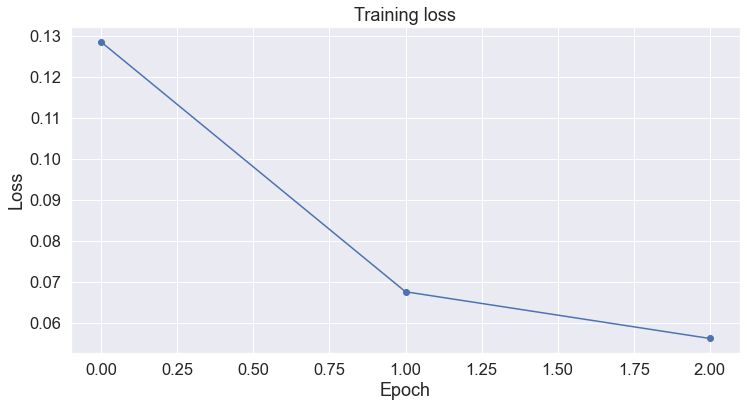

In [56]:
sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# learning curve
plt.plot(loss_values, 'b-o')

plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [57]:
text = """In addition to their essential catalytic role in protein biosynthesis, aminoacyl-tRNA synthetases participate in numerous other functions, including regulation of gene expression and amino acid biosynthesis via transamidation pathways. Herein, we describe a class of aminoacyl-tRNA synthetase-like (HisZ) proteins based on the catalytic core of the contemporary class II histidyl-tRNA synthetase whose members lack aminoacylation activity but are instead essential components of the first enzyme in histidine biosynthesis ATP phosphoribosyltransferase (HisG). Prediction of the function of HisZ in Lactococcus lactis was assisted by comparative genomics, a technique that revealed a link between the presence or the absence of HisZ and a systematic variation in the length of the HisG polypeptide. HisZ is required for histidine prototrophy, and three other lines of evidence support the direct involvement of HisZ in the transferase function. (i) Genetic experiments demonstrate that complementation of an in-frame deletion of HisG from Escherichia coli (which does not possess HisZ) requires both HisG and HisZ from L. lactis. (ii) Coelution of HisG and HisZ during affinity chromatography provides evidence of direct physical interaction. (iii) Both HisG and HisZ are required for catalysis of the ATP phosphoribosyltransferase reaction. This observation of a common protein domain linking amino acid biosynthesis and protein synthesis implies an early connection between the biosynthesis of amino acids and proteins."""

In [58]:
nltk.download('punkt')
sent_text = nltk.sent_tokenize(text)
tokenized_text = []
for sentence in sent_text:
    tokenized_text.append(nltk.word_tokenize(sentence))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sdeshpande/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [59]:
def tokenize_and_preserve(sentence):
    tokenized_sentence = []
    
    for word in sentence:
        tokenized_word = tokenizer.tokenize(word)   
        tokenized_sentence.extend(tokenized_word)

    return tokenized_sentence

In [60]:
tok_texts = [
    tokenize_and_preserve(sent) for sent in tokenized_text
]

In [61]:
input_ids = [tokenizer.convert_tokens_to_ids(txt) for txt in tok_texts]
input_attentions = [[1]*len(in_id) for in_id in input_ids]

In [62]:
tokens = tokenizer.convert_ids_to_tokens(input_ids[1])
new_tokens, new_labels = [], []
for token in tokens:
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        
        new_tokens.append(token)

In [66]:
actual_sentences = []
pred_labels = []
for x,y in zip(input_ids,input_attentions):
    x = torch.tensor(x)
    y = torch.tensor(y)
    x = x.view(-1,x.size()[-1])
    y = y.view(-1,y.size()[-1])
    with torch.no_grad():
        _,y_hat = model(x,y)
    label_indices = y_hat.to('cpu').numpy()
    
    tokens = tokenizer.convert_ids_to_tokens(x.to('cpu').numpy()[0])
    new_tokens, new_labels = [], []
    for token, label_idx in zip(tokens, label_indices[0]):
        if token.startswith("##"):
            new_tokens[-1] = new_tokens[-1] + token[2:]
        else:
            new_labels.append(tag_values[label_idx])
            new_tokens.append(token)
    actual_sentences.append(new_tokens)
    pred_labels.append(new_labels)

In [67]:
for token, label in zip(actual_sentences, pred_labels):
    for t,l in zip(token,label):
        print("{}\t{}".format(t, l))

In	O
addition	O
to	O
their	O
essential	O
catalytic	O
role	O
in	O
protein	O
biosynthesis	O
,	O
aminoacyl	O
-	O
tRNA	O
synthetases	O
participate	O
in	O
numerous	O
other	O
functions	O
,	O
including	O
regulation	O
of	O
gene	O
expression	O
and	O
amino	O
acid	O
biosynthesis	O
via	O
transamidation	O
pathways	O
.	O
Herein	O
,	O
we	O
describe	O
a	O
class	O
of	O
aminoacyl	O
-	O
tRNA	O
synthetase	O
-	O
like	O
(	O
HisZ	O
)	O
proteins	O
based	O
on	O
the	O
catalytic	O
core	O
of	O
the	O
contemporary	O
class	O
II	O
histidyl	O
-	O
tRNA	O
synthetase	O
whose	O
members	O
lack	O
aminoacylation	O
activity	O
but	O
are	O
instead	O
essential	O
components	O
of	O
the	O
first	O
enzyme	O
in	O
histidine	O
biosynthesis	O
ATP	O
phosphoribosyltransferase	O
(	O
HisG	O
)	O
.	O
Prediction	O
of	O
the	O
function	O
of	O
HisZ	O
in	O
Lactococcus	O
lactis	O
was	O
assisted	O
by	O
comparative	O
genomics	O
,	O
a	O
technique	O
that	O
revealed	O
a	O
link	O
between	O
the	O
presence	O
or	O
the	O
absence	O
of	O
HisZ	O
and	O
a	O
system